# 1. Representación data con pandas

### 1.1. Importar libreria relevantes

In [10]:
import pandas as pd
import numpy as np

#visualizacion
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#conectar con drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.2. Abrir data

In [11]:
# leer un archivo csv, ya descargado, e imprimir la cabeza (primero 5 elementos)

In [12]:
df = pd.read_csv("/content/drive/MyDrive/CODIGOS _ia/ds_salaries.csv")


In [13]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salario             607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
 12  salario_en_pesos    607 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 61.8+ KB


### 1.3. Exploración, filtro y limpieza de la  data

In [67]:
# ver encabezado de la data (las primeras 5 filas)
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salario,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_en_pesos
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,359248500
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1170000000
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,490608000
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,90000000
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,675000000


In [69]:
# mostrar las ultimas 5 lineas, filas o registros
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salario,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_en_pesos
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,693000000
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,567000000
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,580500000
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,675000000
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L,900000000


In [70]:
# para describir la data, muestra un  resumen estadístico del dataset
df.describe()

,Unnamed: 0,work_year,salario,salary_in_usd,remote_ratio,salario_en_pesos
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000,6.070000e+02
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257,5.053404e+08
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913,3.193077e+08
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000,1.286550e+07
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000,2.822670e+08
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000,4.570650e+08
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000,6.750000e+08
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000,2.700000e+09


In [71]:
# muestra una lista con todas las columnas que tiene el data frame
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salario', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'salario_en_pesos'],
      dtype='object')

In [20]:
#hacer consultas especificas del dataframe

df[df.salary_in_usd > 250000]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
25,25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
33,33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
63,63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
78,78,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
93,93,2021,SE,FT,Lead Data Engineer,276000,USD,276000,US,0,US,L
97,97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
157,157,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
225,225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
231,231,2021,SE,FT,ML Engineer,256000,USD,256000,US,100,US,S


In [21]:
df[df.salary_in_usd > 250000].describe() #la descripción  salarios mayores a 250.000

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,16.00000,16.000000,16.000000,16.000000,16.000000
mean,233.06250,2021.062500,360837.500000,360837.500000,78.125000
std,197.70364,0.771902,97733.221066,97733.221066,40.697051
min,1.00000,2020.000000,256000.000000,256000.000000,0.000000
25%,74.25000,2020.750000,269100.000000,269100.000000,87.500000
50%,191.00000,2021.000000,352500.000000,352500.000000,100.000000
75%,432.50000,2022.000000,417750.000000,417750.000000,100.000000
max,534.00000,2022.000000,600000.000000,600000.000000,100.000000


In [22]:
#los valores de cierto campo determinado
df.job_title

,job_title
0,Data Scientist
1,Machine Learning Scientist
2,Big Data Engineer
3,Product Data Analyst
4,Machine Learning Engineer
...,...
602,Data Engineer
603,Data Engineer
604,Data Analyst
605,Data Analyst


In [23]:
# hacer una consulta tipo QUERY
df.query("job_title == 'Data Scientist'") #RECUERDE QUE LA CONSULTA QUERY DEBE SER DENTRO DE UNA CADENA

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
10,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
12,12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M
...,...,...,...,...,...,...,...,...,...,...,...,...
592,592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
593,593,2022,SE,FT,Data Scientist,150000,USD,150000,US,100,US,M
596,596,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M
598,598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M


In [24]:
# las filas determinadas
df.iloc[20:40]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
20,20,2020,MI,FT,Machine Learning Engineer,299000,CNY,43331,CN,0,CN,M
21,21,2020,MI,FT,Product Data Analyst,450000,INR,6072,IN,100,IN,L
22,22,2020,SE,FT,Data Engineer,42000,EUR,47899,GR,50,GR,L
23,23,2020,MI,FT,BI Data Analyst,98000,USD,98000,US,0,US,M
24,24,2020,MI,FT,Lead Data Scientist,115000,USD,115000,AE,0,AE,L
25,25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
26,26,2020,EN,FT,Research Scientist,42000,USD,42000,NL,50,NL,L
27,27,2020,SE,FT,Data Engineer,720000,MXN,33511,MX,0,MX,S
28,28,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
29,29,2020,SE,FT,Machine Learning Manager,157000,CAD,117104,CA,50,CA,L


In [25]:
#columnas especificas de una dataframe
df[["job_title", "salary"]]

,job_title,salary
0,Data Scientist,70000
1,Machine Learning Scientist,260000
2,Big Data Engineer,85000
3,Product Data Analyst,20000
4,Machine Learning Engineer,150000
...,...,...
602,Data Engineer,154000
603,Data Engineer,126000
604,Data Analyst,129000
605,Data Analyst,150000


In [26]:
'''otra forma es con la estructura iloc, pero no dando nombres sino posiciones
recordar que la primera posicion es filas las demÁs columnas)'''

df.iloc[:, [2,4,5]]

,experience_level,job_title,salary
0,MI,Data Scientist,70000
1,SE,Machine Learning Scientist,260000
2,SE,Big Data Engineer,85000
3,MI,Product Data Analyst,20000
4,SE,Machine Learning Engineer,150000
...,...,...,...
602,SE,Data Engineer,154000
603,SE,Data Engineer,126000
604,SE,Data Analyst,129000
605,SE,Data Analyst,150000


In [27]:
# columnas determinadas y filas determinadas (estas ultimas son las primeras)
df.iloc[10:40, [2,4,5]]

,experience_level,job_title,salary
10,EN,Data Scientist,45000
11,MI,Data Scientist,3000000
12,EN,Data Scientist,35000
13,MI,Lead Data Analyst,87000
14,MI,Data Analyst,85000
15,MI,Data Analyst,8000
16,EN,Data Engineer,4450000
17,SE,Big Data Engineer,100000
18,EN,Data Science Consultant,423000
19,MI,Lead Data Engineer,56000


In [28]:
# las columnas con nombres y no por posicion, desde una a otra
df.loc[:,"experience_level": "job_title"]

,experience_level,employment_type,job_title
0,MI,FT,Data Scientist
1,SE,FT,Machine Learning Scientist
2,SE,FT,Big Data Engineer
3,MI,FT,Product Data Analyst
4,SE,FT,Machine Learning Engineer
...,...,...,...
602,SE,FT,Data Engineer
603,SE,FT,Data Engineer
604,SE,FT,Data Analyst
605,SE,FT,Data Analyst


In [29]:
#otra forma de consultar, parecido al query
df.loc[df["experience_level"]== "MI"]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
...,...,...,...,...,...,...,...,...,...,...,...,...
567,567,2022,MI,FT,Data Analyst,50000,GBP,65438,GB,0,GB,M
586,586,2022,MI,FT,Data Analyst,35000,GBP,45807,GB,0,GB,M
598,598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M
599,599,2022,MI,FT,Data Scientist,130000,USD,130000,US,100,US,M


In [30]:
# columnas especifica  en una consulta de comparación
df.loc[df["experience_level"]== "MI", ["job_title",	"salary"]]

,job_title,salary
0,Data Scientist,70000
3,Product Data Analyst,20000
7,Data Scientist,11000000
8,Business Data Analyst,135000
11,Data Scientist,3000000
...,...,...
567,Data Analyst,50000
586,Data Analyst,35000
598,Data Scientist,160000
599,Data Scientist,130000


In [31]:
# ordenar consulta de forma ascendente
df.loc[df["experience_level"]== "MI", ["job_title",	"salary"]].sort_values("salary", ascending=True)


,job_title,salary
185,Data Engineer,4000
15,Data Analyst,8000
184,Machine Learning Scientist,12000
192,Big Data Engineer,18000
208,Data Engineer,20000
...,...,...
136,ML Engineer,7000000
137,ML Engineer,8500000
7,Data Scientist,11000000
102,BI Data Analyst,11000000


In [32]:
#cambiar el nombre de una columna
df.rename(columns= {"salary": "salario"})

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salario,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [33]:
df= df.rename(columns= {"salary": "salario"})

In [34]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salario,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [35]:
# borrar columnas
df.drop(columns={"salario"})


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


In [36]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salario,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [37]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salario,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [38]:
# agregar una nueva columna o modificarla

df["salario_en_pesos"] = df.salary_in_usd * 4500
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salario,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_en_pesos
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,359248500
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1170000000
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,490608000
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,90000000
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,675000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,693000000
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,567000000
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,580500000
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,675000000


In [39]:
# obtener muestras aleatorias
df.sample(frac=0.5) #fragmento deel 50 por ciento de los datos

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salario,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_en_pesos
374,374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M,247306500
456,456,2022,SE,FT,Data Engineer,105000,USD,105000,US,100,US,M,472500000
166,166,2021,EN,FT,Data Engineer,80000,USD,80000,US,100,US,L,360000000
319,319,2022,SE,FT,Data Engineer,181940,USD,181940,US,0,US,M,818730000
253,253,2021,EN,FT,Data Scientist,2100000,INR,28399,IN,100,IN,M,127795500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L,2700000000
47,47,2020,SE,FT,Data Engineer,188000,USD,188000,US,100,US,L,846000000
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,490608000
516,516,2022,SE,FT,Data Science Manager,152500,USD,152500,US,100,US,M,686250000


In [40]:
df.sample(n=100) #numero determinado de muestras

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salario,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_en_pesos
289,289,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M,607500000
147,147,2021,MI,FT,Data Engineer,90000,USD,90000,US,100,US,L,405000000
313,313,2022,MI,FT,Data Engineer,60000,GBP,78526,GB,0,GB,M,353367000
526,526,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M,351000000
533,533,2022,SE,FT,Machine Learning Engineer,192600,USD,192600,US,100,US,M,866700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,293,2022,MI,FT,Data Scientist,90000,USD,90000,US,0,US,M,405000000
151,151,2021,MI,FT,Data Scientist,150000,USD,150000,US,100,US,M,675000000
406,406,2022,MI,FT,Data Analyst,58000,USD,58000,US,0,US,S,261000000
581,581,2022,SE,FT,Data Analyst,106260,USD,106260,US,100,US,M,478170000


In [41]:
# agrupar datos determinados y bajo una medida
df.groupby("job_title").mean(numeric_only=True)

,Unnamed: 0,work_year,salario,salary_in_usd,remote_ratio,salario_en_pesos
job_title,,,,,,
3D Computer Vision Researcher,77.000000,2021.000000,4.000000e+05,5409.000000,50.000000,2.434050e+07
AI Scientist,254.142857,2021.142857,2.905714e+05,66135.571429,78.571429,2.976101e+08
Analytics Engineer,458.250000,2022.000000,1.750000e+05,175000.000000,50.000000,7.875000e+08
Applied Data Scientist,351.600000,2021.600000,1.724000e+05,175655.000000,70.000000,7.904475e+08
Applied Machine Learning Scientist,321.000000,2021.500000,1.413500e+05,142068.750000,87.500000,6.393094e+08
BI Data Analyst,106.333333,2020.833333,1.902045e+06,74755.166667,66.666667,3.363982e+08
Big Data Architect,255.000000,2021.000000,1.250000e+05,99703.000000,50.000000,4.486635e+08
Big Data Engineer,123.125000,2020.625000,4.550000e+05,51974.000000,50.000000,2.338830e+08
Business Data Analyst,256.800000,2021.000000,3.550000e+05,76691.200000,90.000000,3.451104e+08


In [42]:
df.groupby("job_title").mean(numeric_only=True).count() #cuenta elementos de la agrupación

,0
Unnamed: 0,50
work_year,50
salario,50
salary_in_usd,50
remote_ratio,50
salario_en_pesos,50


In [43]:
df.groupby("job_title").agg({
    "salario": ["max", "mean"]
})  #agrupar por una columan y determinadas medidas

salario              
                                               max          mean
job_title                                                       
3D Computer Vision Researcher               400000  4.000000e+05
AI Scientist                               1335000  2.905714e+05
Analytics Engineer                          205300  1.750000e+05
Applied Data Scientist                      380000  1.724000e+05
Applied Machine Learning Scientist          423000  1.413500e+05
BI Data Analyst                           11000000  1.902045e+06
Big Data Architect                          125000  1.250000e+05
Big Data Engineer                          1672000  4.550000e+05
Business Data Analyst                      1400000  3.550000e+05
Cloud Data Engineer                         160000  1.400000e+05
Computer Vision Engineer                    180000  8.350000e+04
Computer Vision Software Engineer           150000  1.003333e+05
Data Analyst                                450000  9.660496e+04
Data Analytics Engineer                     110000  6.175000e+04
Data Analytics Lead                         405000  4.050000e+05
Data Analytics Manager                      150260  1.271343e+05
Data Architect                              266400  1.778739e+05
Data Engineer                              4450000  1.792106e+05
Data Engineering Manager                    174000  1.197998e+05
Data Science Consultant                     423000  1.227143e+05
Data Science Engineer                       159500  8.450000e+04
Data Science Manager                       7000000  1.062599e+06
Data Scientist                            30400000  5.083472e+05
Data Specialist                             165000  1.650000e+05
Director of Data Engineering                200000  1.412500e+05
Director of Data Science                    325000  1.932857e+05
ETL Developer                                50000  5.000000e+04
Finance Data Analyst                         45000  4.500000e+04
Financial Data Analyst                      450000  2.750000e+05
Head of Data                                235000  1.564000e+05
Head of Data Science                        224000  1.467188e+05
Head of Machine Learning                   6000000  6.000000e+06
Lead Data Analyst                          1450000  5.690000e+05
Lead Data Engineer                          276000  1.403333e+05
Lead Data Scientist                        3000000  1.101667e+06
Lead Machine Learning Engineer               80000  8.000000e+04
ML Engineer                                8500000  2.676667e+06
Machine Learning Developer                  100000  1.000000e+05
Machine Learning Engineer                  4900000  2.727179e+05
Machine Learning Infrastructure Engineer    195000  9.733333e+04
Machine Learning Manager                    157000  1.570000e+05
Machine Learning Scientist                  260000  1.584125e+05
Marketing Data Analyst                       75000  7.500000e+04
NLP Engineer                                240000  2.400000e+05
Principal Data Analyst                      170000  1.225000e+05
Principal Data Engineer                     600000  3.283333e+05
Principal Data Scientist                    416000  2.067143e+05
Product Data Analyst                        450000  2.350000e+05
Research Scientist                          450000  1.104937e+05
Staff Data Scientist                        105000  1.050000e+05

In [44]:
# agrupar datos determinados y bajo una medida
df.job_title.value_counts()

,count
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Machine Learning Scientist,8
Big Data Engineer,8


In [45]:
df.shape #tamaño de data

(607, 13)

In [46]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salario,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_en_pesos
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,359248500
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1170000000
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,490608000
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,90000000
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,675000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,693000000
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,567000000
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,580500000
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,675000000


In [47]:
#elementos unicos de cada columna
df.nunique()

,0
Unnamed: 0,607
work_year,3
experience_level,4
employment_type,4
job_title,50
salario,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3


In [48]:
df.isnull().sum() #que datos son nulos

,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salario,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


# 2. Visualización de datos con Matplolib

### 2.1. Gráfico de barras

In [49]:
#las primeras 10 empleos mas comunes
top10_job_title = df['job_title'].value_counts()[:10]

In [50]:
top10_job_title

,count
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Machine Learning Scientist,8
Big Data Engineer,8


**Lineas de codificación**
* px.bar(...): Crea un gráfico de barras.
* x=top10_job_title.index: Usa los títulos de trabajo (índices de la serie) como el eje X.
* y=top10_job_title.values: Usa la cantidad de veces que aparecen los títulos como eje Y.
* color=top10_job_title.index: Asigna diferentes colores a cada categoría (título de trabajo).
* color_discrete_sequence=px.colors.sequential.PuBuGn: Usa una paleta de colores predefinida (PuBuGn).
* text=top10_job_title.values: Muestra los valores sobre las barras.
* title='2.1.2. Top 10 Job Titles': Agrega un título al gráfico.
* template='plotly_dark': Usa un tema oscuro para el diseño.

In [51]:
fig = px.bar(y=top10_job_title.values,
             x=top10_job_title.index,
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= 'Top 10 Job Titles',
             template= 'plotly_dark')
fig.show()


El método update_layout() se usa para modificar el diseño del gráfico. Aquí está lo que hace cada argumento:

* xaxis_title="Job Titles" : Cambia el título del eje X a "Job Titles" (Títulos de Trabajo).
y Este eje representa las categorías (diferentes títulos de trabajo).

*yaxis_title="count" : Cambia el título del eje Y a "count" (Cantidad).
Este eje muestra la frecuencia de cada título de trabajo en los datos.

* font=dict(size=17, family="Franklin Gothic") Ajusta el tamaño y la fuente del texto en el gráfico.
size=17: Aumenta el tamaño del texto a 17 puntos.
family="Franklin Gothic": Usa la fuente "Franklin Gothic" para los textos.

In [52]:
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

### 2.2. Gráfico de tortas

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64


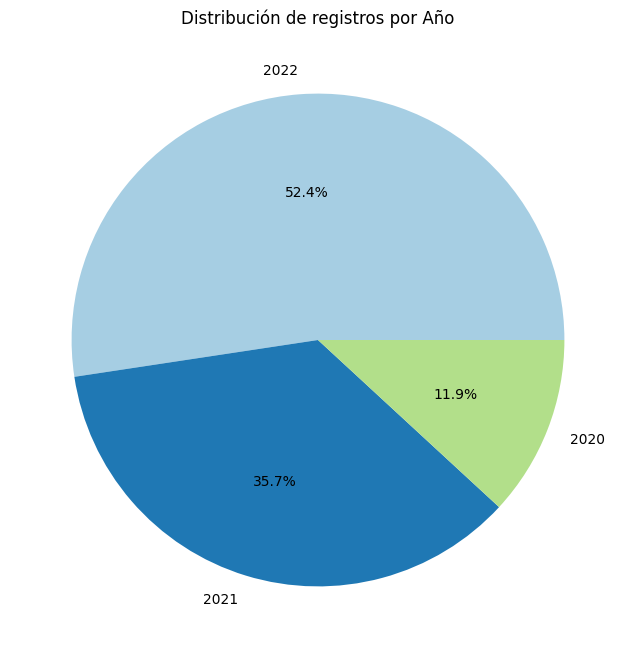

In [53]:
# Contar cuántos registros hay por año
conteo_años = df["work_year"].value_counts()
print(conteo_años)

# Crear el gráfico de torta
plt.figure(figsize=(8,8))
plt.pie(conteo_años, labels=conteo_años.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)

# Título y mostrar gráfico
plt.title("Distribución de registros por Año")
plt.show()

### 2.3. Gráfico de líneas o dispersión

vamos a construir un digrama de lineas por cada variable cuantitativa, sirve para ver el comportramiento de una variable en el tiempo


In [54]:
#seleccionamos solo tipo de datos numericos
df_cuant= df.select_dtypes(include=['int64', 'float64'])
df_cuant

,Unnamed: 0,work_year,salario,salary_in_usd,remote_ratio,salario_en_pesos
0,0,2020,70000,79833,0,359248500
1,1,2020,260000,260000,0,1170000000
2,2,2020,85000,109024,50,490608000
3,3,2020,20000,20000,0,90000000
4,4,2020,150000,150000,50,675000000
...,...,...,...,...,...,...
602,602,2022,154000,154000,100,693000000
603,603,2022,126000,126000,100,567000000
604,604,2022,129000,129000,0,580500000
605,605,2022,150000,150000,100,675000000


In [55]:
#eliminar la columna sin nombre
df_cuant= df_cuant.iloc[:, 1:]
df_cuant

,work_year,salario,salary_in_usd,remote_ratio,salario_en_pesos
0,2020,70000,79833,0,359248500
1,2020,260000,260000,0,1170000000
2,2020,85000,109024,50,490608000
3,2020,20000,20000,0,90000000
4,2020,150000,150000,50,675000000
...,...,...,...,...,...
602,2022,154000,154000,100,693000000
603,2022,126000,126000,100,567000000
604,2022,129000,129000,0,580500000
605,2022,150000,150000,100,675000000


In [56]:
#grafica uno por uno

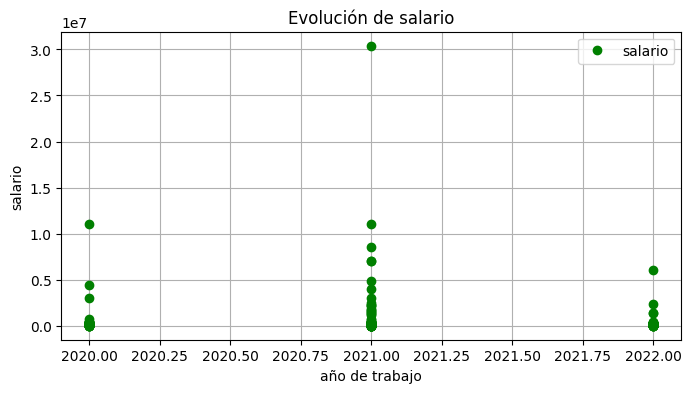

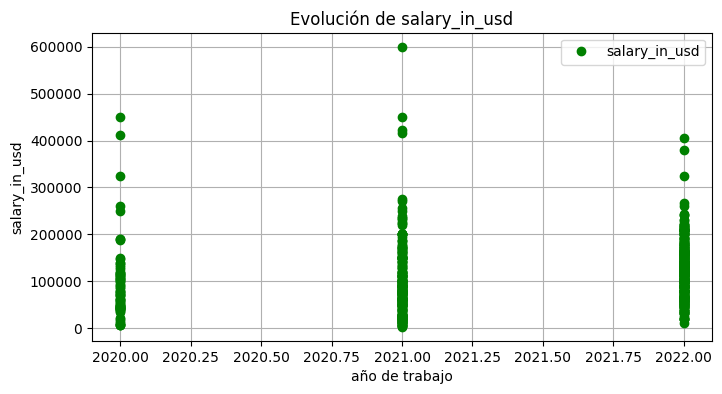

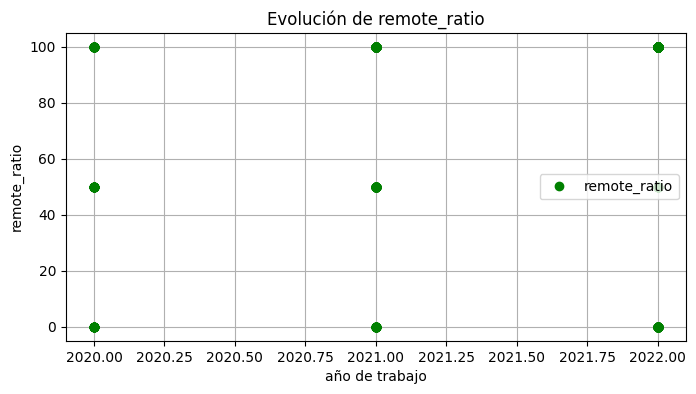

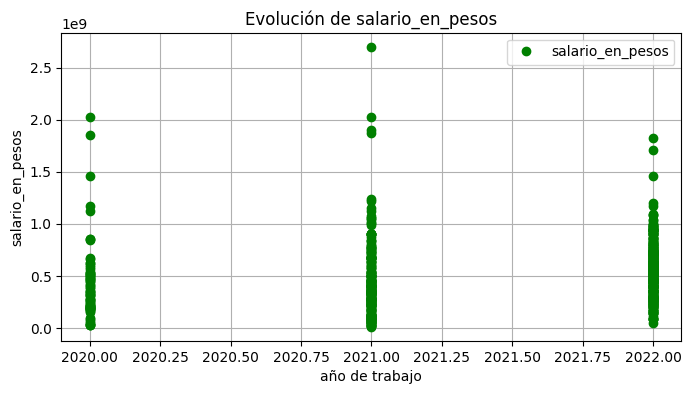

In [57]:
for i in range(1, df_cuant.shape[1]): #no toma la columna año, y va a iterar sobre el numero de columnas que es segundo espacio
    plt.figure(figsize=(8, 4))  # Crear una nueva figura para cada gráfico

    plt.plot(df_cuant.work_year, df_cuant.iloc[:, i], marker="o", linestyle="",color="green", label=df_cuant.columns[i])

    # Personalización del gráfico
    plt.xlabel("año de trabajo")
    plt.ylabel(df_cuant.columns[i])
    plt.title(f"Evolución de {df_cuant.columns[i]}")
    plt.legend()
    plt.grid(True)

    plt.show()  # Mostrar cada gráf

### 4. Distribución normal

In [58]:
df_cuant= df_cuant.iloc[:,1:] #elmina de una vez la columna año
df_cuant

,salario,salary_in_usd,remote_ratio,salario_en_pesos
0,70000,79833,0,359248500
1,260000,260000,0,1170000000
2,85000,109024,50,490608000
3,20000,20000,0,90000000
4,150000,150000,50,675000000
...,...,...,...,...
602,154000,154000,100,693000000
603,126000,126000,100,567000000
604,129000,129000,0,580500000
605,150000,150000,100,675000000


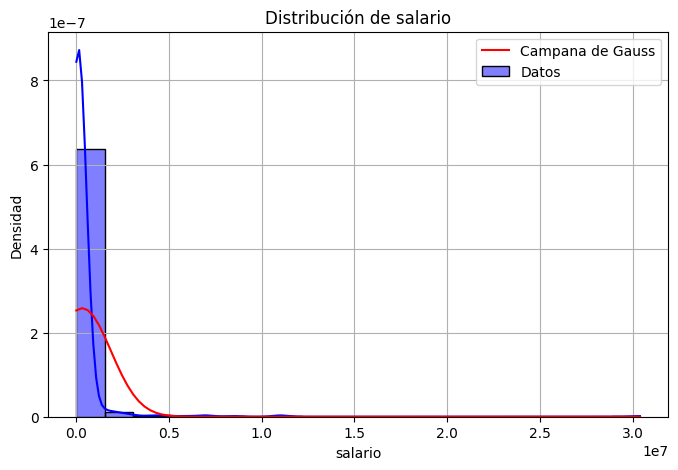

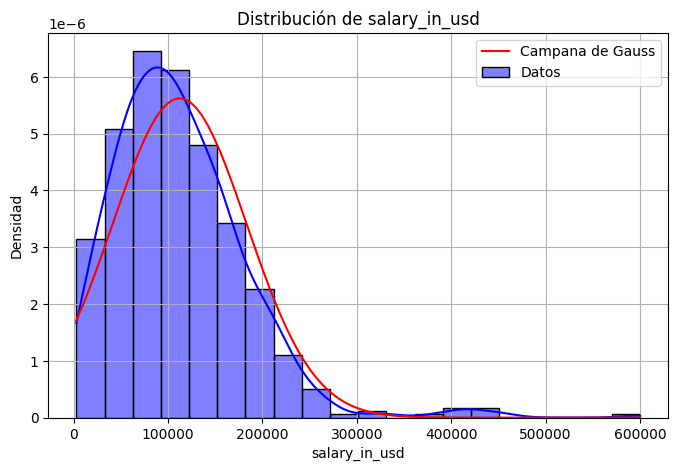

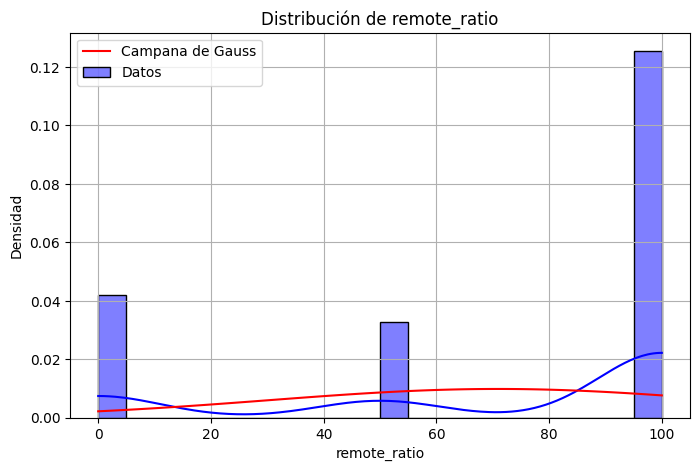

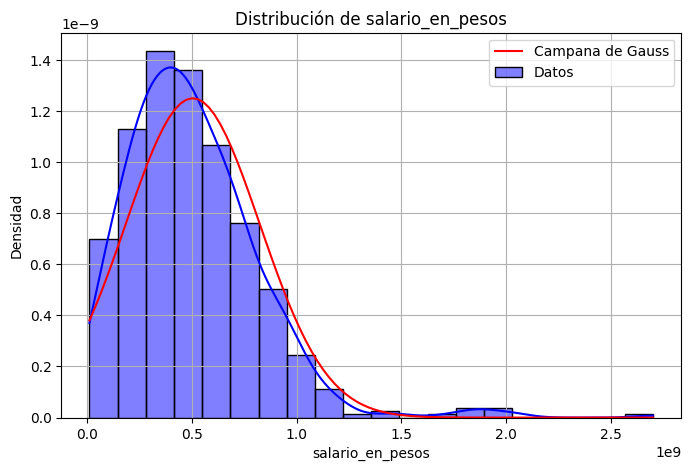

In [59]:
# Graficar cada variable numérica con su campana de Gauss
for columna in df_cuant.columns:
    plt.figure(figsize=(8, 5))  # Nueva figura para cada variable

    # Histograma con densidad
    sns.histplot(df_cuant[columna], kde=True, bins=20, stat="density", color="blue", label="Datos")

    # Ajuste de la curva normal teórica
    media = df_cuant[columna].mean()
    desviacion = df_cuant[columna].std()
    x = np.linspace(df_cuant[columna].min(), df_cuant[columna].max(), 100) #linea de ahuste de la cuerva
    y = norm.pdf(x, media, desviacion)
    plt.plot(x, y, color="red", label="Campana de Gauss")

    # Personalización del gráfico
    plt.title(f"Distribución de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Densidad")
    plt.legend()
    plt.grid(True)

    plt.show()  # Muestra cada gráfico individualmente


### 5. Matriz de correlacion

la correlacción entre los datos, sirve para revisar la relacion de los datos

In [60]:
correlacion = df_cuant.corr() #hallar valor de datos relacionados
correlacion

,salario,salary_in_usd,remote_ratio,salario_en_pesos
salario,1.000000,-0.083906,-0.014608,-0.083906
salary_in_usd,-0.083906,1.000000,0.132122,1.000000
remote_ratio,-0.014608,0.132122,1.000000,0.132122
salario_en_pesos,-0.083906,1.000000,0.132122,1.000000


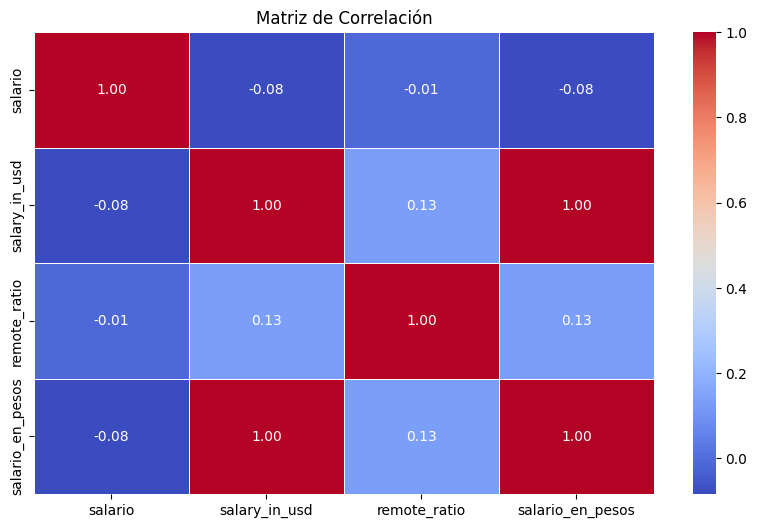

In [61]:
# graficad
correlacion = df_cuant.corr()
# 🔹 Crear el mapa de calor
plt.figure(figsize=(10, 6))  # Ajustar tamaño de la figura
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 🔹 Título del gráfico
plt.title("Matriz de Correlación")

# 🔹 Mostrar el gráfico
plt.show()

### 6. Diagrama de cajas

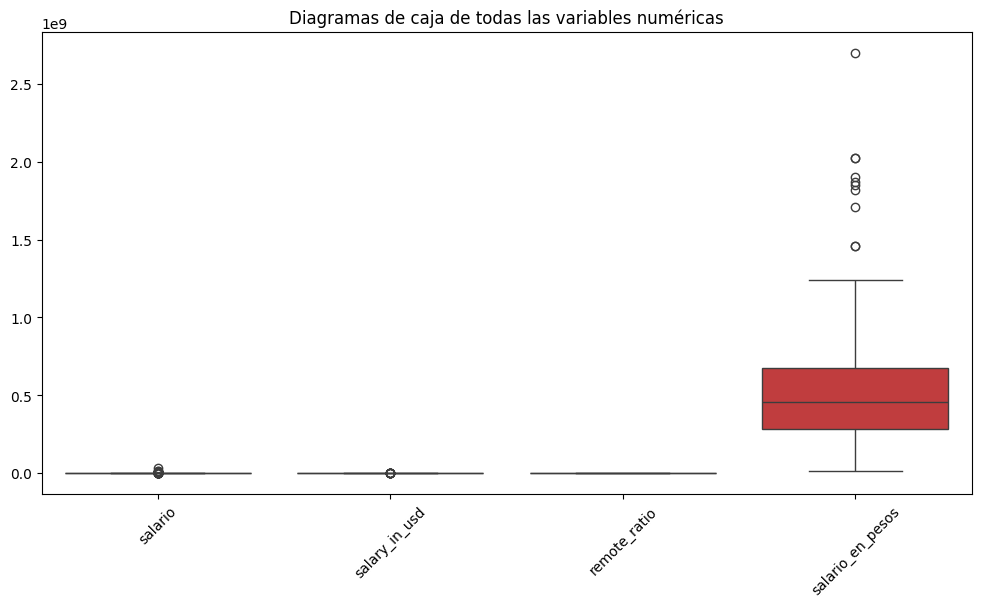

In [62]:

# 🔹 Crear un boxplot para todas las columnas numéricas
plt.figure(figsize=(12,6))  # Tamaño del gráfico
sns.boxplot(df_cuant)

# 🔹 Mejorar visualización
plt.xticks(rotation=45)  # Rotar nombres de variables
plt.title("Diagramas de caja de todas las variables numéricas")

# 🔹 Mostrar gráfico
plt.show()


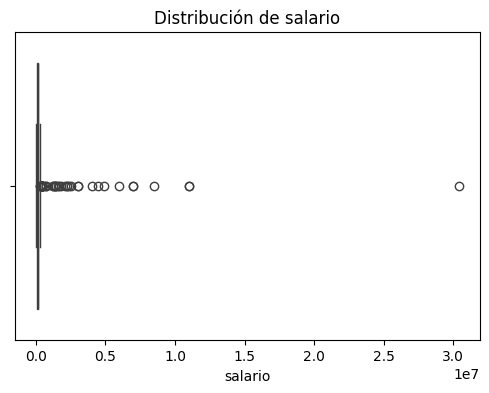

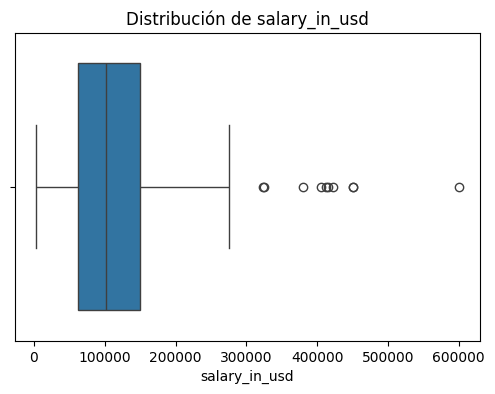

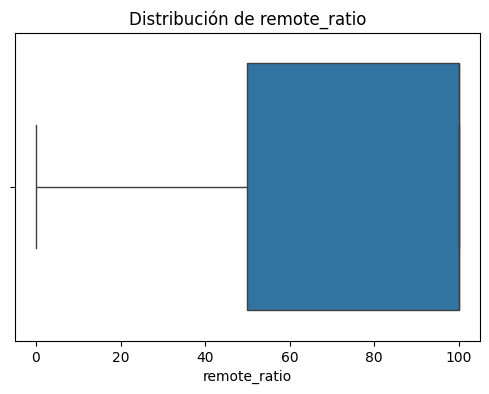

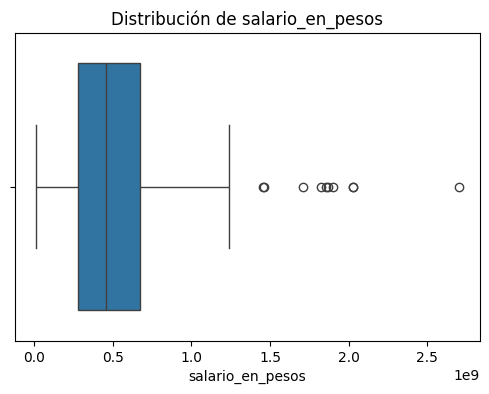

In [63]:

for i in range(0, df_cuant.shape[1]):
    plt.figure(figsize=(6,4))  # Tamaño de cada gráfico
    sns.boxplot(x=df_cuant.iloc[:, i])
    plt.title(f"Distribución de {df_cuant.columns[i]}")  # Título con el nombre de la variable
    plt.show()


### 7. Diagrama de nulos

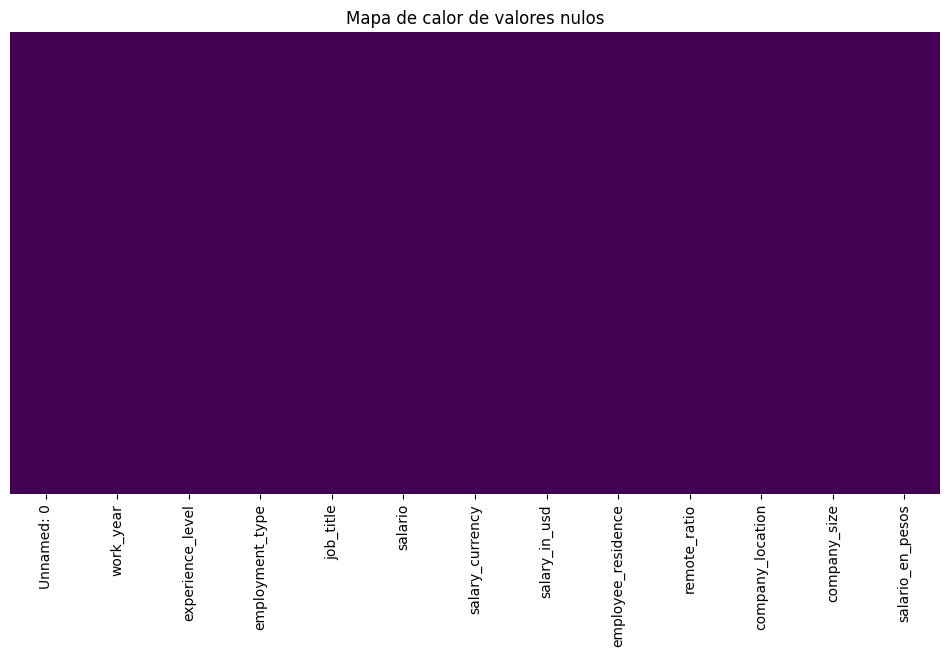

In [64]:
#valores nulos en toda la data
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

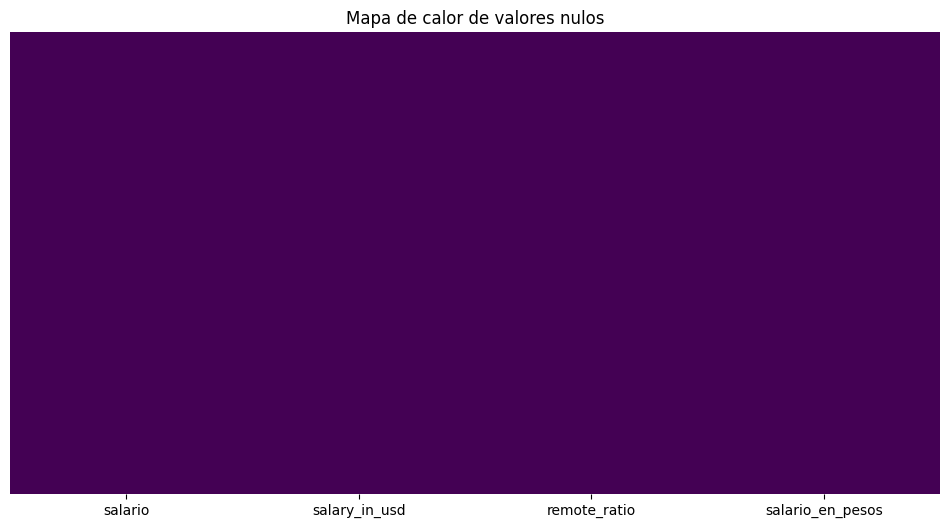

In [65]:
# nulos en  df_cuant
plt.figure(figsize=(12,6))
sns.heatmap(df_cuant.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores nulos")
plt.show()